In [ ]:
#схема Лакса-Фридрихса
import math as mt
import numpy as np
import matplotlib.pyplot as pl
eps = 0.0001
gamma = 1.4
c = 3000
L = 1.0
n = 1000
a = 0
b = L
h = (b-a)/n

#tau = 0.000001 ЗАДАН НИЖЕ
#0.000000001
#0.00000001


#инициализация#
x = np.linspace(0, L, n+1)
A = np.linspace(0, L, n+1)
dA = np.linspace(0, L, n+1)
e = np.linspace(0, L, n+1)

po = np.linspace(0, L, n+1)
poprev = np.linspace(0, L, n+1)
p = np.linspace(0, L, n+1)
M = np.linspace(0, L, n+1)
u = np.linspace(0, L, n+1)

Q = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
F = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
S = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qnext = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])

As = 0.5
xs = 0.5
for i in range(0,n+1):
    A[i] = As + (1-As)*(1-x[i]/xs)**2 
for i in range(1,n):
    dA[i] = 0.5 * (A[i+1] - A[i-1])/h  #4*x[i] - 2

#нач и гран условия#

#=====================================

#задача 1

po[0] = 1.0
u[0] = 1.0237498
p[0] = 8.0
po[n] = 0.1933880
u[n] = 5.2937598
p[n] = 0.8018469

#задача 2 

# po[0] = 1.0
# u[0] = 1.0237498
# p[0] = 8.0
# po[n] = 0.8835893
# u[n] = 1.1586268
# p[n] = 7.0315580

#=====================================

for i in range(1,n): #???#
    po[i] = po[n]
    u[i] = u[n]
    p[i] = p[n]
    
    
#     ШАГ ПО ВРЕМЕНИ    #

tau = 0.6 * h/max(u)
print(max(u),tau)


#поэлементное умножение нампи
Q[0] = A*po
Q[1] = A*po*u
Q[2] = A*po*( u*u/2 + p/(po*(gamma-1)) ) 
Qnext = Q.copy()

F[0] = A*po*u
F[1] = A*(po*u*u + p)
F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

S[0] = 0
S[1] = p * dA
S[2] = 0

#расчет нового  q
#расчет новых давления скорости и плотности
#расчет новых f and s
for k in range(1000000): #1) 1000
    
    Qnext[:,1:-1] = 1/2 * (Q[:,0:-2] + Q[:,2:]) - tau/(2*h) * (F[:,2:] - F[:,0:-2]) + tau * S[:,1:-1]
    
    poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()
    
    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0
    
    if ( max( abs((po-poprev)/(poprev* tau)) ) ) < eps:
        print(k)
        break

    
      
pl.plot(x,po)    

with open('2DV.dat','w') as f:
        #f.write('TITLE = "-"\n')
        f.write('VARIABLES=" V1"," V2" \n')
        f.write('ZONE  I = 1001 \n' )#101 101
        for i in range(0,n+1):#0
            a = str(x[i]) +  " " +  str(po[i]) + str(" \n")
            f.write(a)

5.2937598 0.0001
12754


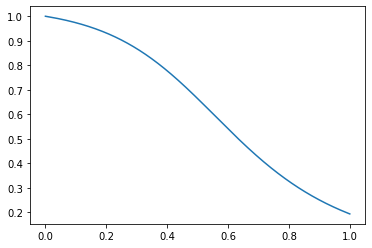

In [7]:
#схема Маккормака
import math as mt
import numpy as np
import matplotlib.pyplot as pl
eps = 10e-4
gamma = 1.4
c = 3000
L = 1.0
n = 1000
a = 0
b = L
h = (b-a)/n
kappa = 0.5
#tau = 0.00000001
#0.000000001
#0.00000001


#инициализация#
x = np.linspace(0, L, n+1)
A = np.linspace(0, L, n+1)
dA = np.linspace(0, L, n+1)
e = np.linspace(0, L, n+1)

po = np.linspace(0, L, n+1)
poprev = np.linspace(0, L, n+1)
p = np.linspace(0, L, n+1)
M = np.linspace(0, L, n+1)
u = np.linspace(0, L, n+1)

Q = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
F = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
S = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qnext = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Qs = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Fs = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])
Ss = np.array([[1.1 for i in range(0,n+1)] for j in range(0,3)])

As = 0.5
xs = 0.5
for i in range(0,n+1):
    A[i] = As + (1-As)*(1-x[i]/xs)**2 
for i in range(1,n):
    dA[i] = 0.5 * (A[i+1] - A[i-1])/h  #4*x[i] - 2   
    
#нач и гран условия#

#=====================================

#задача 1

po[0] = 1.0
u[0] = 1.0237498
p[0] = 8.0
po[n] = 0.1933880
u[n] = 5.2937598
p[n] = 0.8018469

#задача 2 

# po[0] = 1.0
# u[0] = 1.0237498
# p[0] = 8.0
# po[n] = 0.8835893
# u[n] = 1.1586268
# p[n] = 7.0315580

#=====================================

for i in range(1,n): #???#
    po[i] = po[n]
    u[i] = u[n]
    p[i] = p[n]
    
#     ШАГ ПО ВРЕМЕНИ    #

tau = 0.0001#0.4 * h/max(u)
# 1)tau = 0.0001 + kappa = 0.5 (работает)
print(max(u),tau)  

#---------------------- #    

#поэлементное умножение нампи
Q[0] = A*po
Q[1] = A*po*u
Q[2] = A*po*(u*u/2 + p/(po*(gamma-1))) 
Qnext = Q.copy()

F[0] = A*po*u
F[1] = A*(po*u*u + p)
F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

S[0] = 0
S[1] = p * dA
S[2] = 0

Qs = Q.copy()
Fs = F.copy()
Ss = S.copy()

#расчет нового  q
#расчет новых давления скорости и плотности
#расчет новых f and s
for k in range(100000): #1) 1000
    
    #первый шаг
    Qnext[:,1:-1] = Q[:,1:-1] - tau/h * (F[:,2:] - F[:,1:-1]) + tau*S[:,1:-1]    
   
    poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Qs[0] = Qnext[0].copy()
    Qs[1] = Qnext[1].copy()
    Qs[2] = Qnext[2].copy()
    
    Fs[0] = A*po*u
    Fs[1] = A*(po*u*u + p)
    Fs[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    Ss[0] = 0
    Ss[1] = p * dA
    Ss[2] = 0
    
    #второй шаг
    Qnext[:,1:-1] = 1/2*( Q[:,1:-1] + Qs[:,1:-1] - tau/h * (Fs[:,1:-1] - Fs[:,0:-2]) + tau*Ss[:,1:-1] )
    
    #poprev = po.copy()
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()
    
    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0
    
    #пересчет с учетом искуственной численной вязкости
    Qnext[:,1:-1] = Q[:,1:-1] + kappa*tau/h*( abs(u[2:]-u[1:-1])*(Q[:,2:] - Q[:,1:-1]) - abs(u[1:-1]-u[0:-2])*(Q[:,1:-1] - Q[:,0:-2]) )
    
    po[1:-1] = Qnext[0,1:-1]/A[1:-1]
    u[1:-1] = Qnext[1,1:-1]/(A[1:-1]*po[1:-1])
    p[1:-1] = (Qnext[2,1:-1]/(A[1:-1]*po[1:-1]) - u[1:-1]*u[1:-1]/2) * po[1:-1]*(gamma-1)
      
    M = u/c
    
    Q[0] = Qnext[0].copy()
    Q[1] = Qnext[1].copy()
    Q[2] = Qnext[2].copy()
    
    F[0] = A*po*u
    F[1] = A*(po*u*u + p)
    F[2] = A*u*(po*(u*u/2 + p/(po*(gamma-1))) + p)

    S[0] = 0
    S[1] = p * dA
    S[2] = 0 
    
    if ( max( abs((po-poprev)/(tau*po)) ) ) < eps:
        print(k)
        break

    
      
pl.plot(x,po)    



In [ ]:
M = np.linspace(0, L, n+1)
print(M)
print(M*M)